In [5]:
import numpy as np
import pandas as pd
import nltk 
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import re
from textblob import TextBlob
from wordcloud import wordcloud
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
!pip install textblob

   ---------------------------------------- 0.0/626.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/626.3 kB ? eta -:--:--
    --------------------------------------- 10.2/626.3 kB ? eta -:--:--
    --------------------------------------- 10.2/626.3 kB ? eta -:--:--
    --------------------------------------- 10.2/626.3 kB ? eta -:--:--
   - ------------------------------------- 30.7/626.3 kB 187.9 kB/s eta 0:00:04
   - ------------------------------------- 30.7/626.3 kB 187.9 kB/s eta 0:00:04
   --- ----------------------------------- 61.4/626.3 kB 233.8 kB/s eta 0:00:03
   ----- --------------------------------- 81.9/626.3 kB 306.3 kB/s eta 0:00:02
   ------ ------------------------------- 112.6/626.3 kB 328.2 kB/s eta 0:00:02
   ------- ------------------------------ 122.9/626.3 kB 343.4 kB/s eta 0:00:02
   ------------- ------------------------ 225.3/626.3 kB 509.6 kB/s eta 0:00:01
   -------------- ----------------------- 245.8/626.3 kB 538.9 kB/s eta 0:00:01
  

In [4]:
!pip install wordcloud

   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   ---- ----------------------------------- 30.7/300.2 kB ? eta -:--:--
   ---- ----------------------------------- 30.7/300.2 kB ? eta -:--:--
   ---- ----------------------------------- 30.7/300.2 kB ? eta -:--:--
   ----- --------------------------------- 41.0/300.2 kB 245.8 kB/s eta 0:00:02
   ----- --------------------------------- 41.0/300.2 kB 245.8 kB/s eta 0:00:02
   -------------- ----------------------- 112.6/300.2 kB 409.6 kB/s eta 0:00:01
   -------------- ----------------------- 112.6/300.2 kB 409.6 kB/s eta 0:00:01
   ------------------ ------------------- 143.4/300.2 kB 425.3 kB/s eta 0:00:01
   ------------------------- 

In [15]:
pip install nltk


Note: you may need to restart the kernel to use updated packages.


In [6]:
import nltk
nltk.__version__


'3.8.1'

In [8]:
pip install textblob


     -------------------------------------- 626.3/626.3 kB 1.3 MB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 2.7 MB/s eta 0:00:00
  Attempting uninstall: nltk
    Found existing installation: nltk 3.7
    Uninstalling nltk-3.7:
      Successfully uninstalled nltk-3.7
Note: you may need to restart the kernel to use updated packages.


In [11]:
pip install wordcloud


     ------------------------------------ 300.0/300.0 kB 772.7 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [13]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [7]:
pip show seaborn

Name: seaborn
Version: 0.12.2
Summary: Statistical data visualization
Home-page: 
Author: 
Author-email: Michael Waskom <mwaskom@gmail.com>
License: 
Location: C:\Users\YUTIKA\anaconda3\Lib\site-packages
Requires: matplotlib, numpy, pandas
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [12]:
import cufflinks as cf

In [11]:
!pip install cufflinks

In [13]:
pip show cufflinks

Name: cufflinks
Version: 0.17.3
Summary: Productivity Tools for Plotly + Pandas
Home-page: https://github.com/santosjorge/cufflinks
Author: Jorge Santos
Author-email: santos.jorge@gmail.com
License: MIT
Location: C:\Users\YUTIKA\anaconda3\Lib\site-packages
Requires: colorlover, ipython, ipywidgets, numpy, pandas, plotly, setuptools, six
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [6]:
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected = True)
cf.go_offline();

In [14]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots

In [15]:
import warnings
# Ignore warnings
warnings.filterwarnings('ignore')
warnings.warn('this will not show')

# Set maximum columns display option
pd.set_option('display.max_columns', 100) 

In [17]:
df = pd.read_csv('amazon.csv')

In [18]:
df.head()

,Unnamed: 0,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
0,0,NaN,4,No issues.,23-07-2014,138,0,0,0,0,0.0,0.0
1,1,0mie,5,"Purchased this for my device, it worked as adv...",25-10-2013,409,0,0,0,0,0.0,0.0
2,2,1K3,4,it works as expected. I should have sprung for...,23-12-2012,715,0,0,0,0,0.0,0.0
3,3,1m2,5,This think has worked out great.Had a diff. br...,21-11-2013,382,0,0,0,0,0.0,0.0
4,4,2&amp;1/2Men,5,"Bought it with Retail Packaging, arrived legit...",13-07-2013,513,0,0,0,0,0.0,0.0


In [19]:
df= df.sort_values("wilson_lower_bound", ascending = False)
df.drop('Unnamed: 0', inplace = True, axis=1)
df.head()

,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
2031,"Hyoun Kim ""Faluzure""",5,[[ UPDATE - 6/19/2014 ]]So my lovely wife boug...,05-01-2013,702,1952,68,2020,1884,0.966337,0.957544
3449,NLee the Engineer,5,I have tested dozens of SDHC and micro-SDHC ca...,26-09-2012,803,1428,77,1505,1351,0.948837,0.936519
4212,SkincareCEO,1,NOTE: please read the last update (scroll to ...,08-05-2013,579,1568,126,1694,1442,0.925620,0.912139
317,"Amazon Customer ""Kelly""",1,"If your card gets hot enough to be painful, it...",09-02-2012,1033,422,73,495,349,0.852525,0.818577
4672,Twister,5,Sandisk announcement of the first 128GB micro ...,03-07-2014,158,45,4,49,41,0.918367,0.808109


In [21]:
def missing_values_analysis(df):
    na_columns = [col for col in df.columns if df[col].isnull().sum() > 0]
    n_miss = df[na_columns].isnull().sum().sort_values(ascending=True)
    ratio = (df[na_columns].isnull().sum() / df.shape[0] * 100).sort_values(ascending=True)
    missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=['Missing Values', 'Ratio'])
    missing_df = pd.DataFrame(missing_df)
    return missing_df

In [22]:
def check_dataframe(df, head=5, tail= 5):
    print("SHAPE".center(82, '~'))
    print("ROWS: {}" .format(df.shape[0]))
    print('columns; {}' .format(df.shape[1]))
    print('TYPES' .center(82, '~'))
    print(df.dtypes)
    print("".center(82, '~'))
    print(missing_values_analysis(df))
    print('DUPLICATED VALUES' .center(83,'~'))
    print(df.duplicated().sum())
    print('QUANTILES'.center(82,'~'))
    print(df.quantile([0, 0.05, 0.50, 0.95, 0.99, 1]).T)
    
check_dataframe(df)

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~SHAPE~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
ROWS: 4915
columns; 11
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~TYPES~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
reviewerName             object
overall                   int64
reviewText               object
reviewTime               object
day_diff                  int64
helpful_yes               int64
helpful_no                int64
total_vote                int64
score_pos_neg_diff        int64
score_average_rating    float64
wilson_lower_bound      float64
dtype: object
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
              Missing Values  Ratio
reviewerName               1   0.02
reviewText                 1   0.02
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~DUPLICATED VALUES~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
0
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~QUANTILES~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [23]:
def check_class(dataframe):
    nunique_df = pd.DataFrame({'Variable': dataframe.columns,
                              'Classes': [dataframe[i].nunique() \
                                         for i in dataframe.columns]})
    nunique_df = nunique_df.sort_values('Classes', ascending = False)
    nunique_df = nunique_df.reset_index(drop = True)
    return nunique_df
check_class(df)

,Variable,Classes
0,reviewText,4912
1,reviewerName,4594
2,reviewTime,690
3,day_diff,690
4,wilson_lower_bound,40
5,score_average_rating,28
6,score_pos_neg_diff,27
7,total_vote,26
8,helpful_yes,23
9,helpful_no,17


In [24]:
import plotly.graph_objs as go

In [25]:
import plotly.graph_objs as go
from plotly.offline import iplot
from plotly.subplots import make_subplots
constraints = ['#FF0000','#00FF00','#0000FF','#FFFF00',' #FF00FF']
def categorical_variable_summary(df, column_name):
    fig = make_subplots(rows=1, cols=2,
                    subplot_titles=('Countplot', 'Percentage'),
                    specs=[[{"type": 'xy'}, {"type": 'domain'}]])
    
    fig.add_trace(go.Bar( y =df[column_name].value_counts().values.tolist(),
                        x= [str(i) for i in df[column_name].value_counts().index],
                        text = df[column_name].value_counts().values.tolist(),
                        textfont = dict(size=14),
                        
                        textposition = 'auto',
                        showlegend = False,
                        name = column_name,
                        marker = dict(color = constraints,
                                     line = dict(color = '#DBE6EC',
                                                width = 1))),
                 row = 1, col = 1)
    
    fig.add_trace(go.Pie(labels=df[column_name].value_counts().keys(),
                     values=df[column_name].value_counts().values,
                     textposition='auto',
                     showlegend=False,  # Corrected typo
                     name=column_name,
                     marker=dict(colors=constraints)),  # Corrected 'color' to 'colors'
              row=1, col=2)
    
    fig.update_layout(title={'text' : column_name,
                            'y' : 0.9,
                            'x' : 0.5,
                            'xanchor' : 'center',
                            'yanchor' : 'top'},
                     template = 'plotly_white' )   
    iplot(fig)

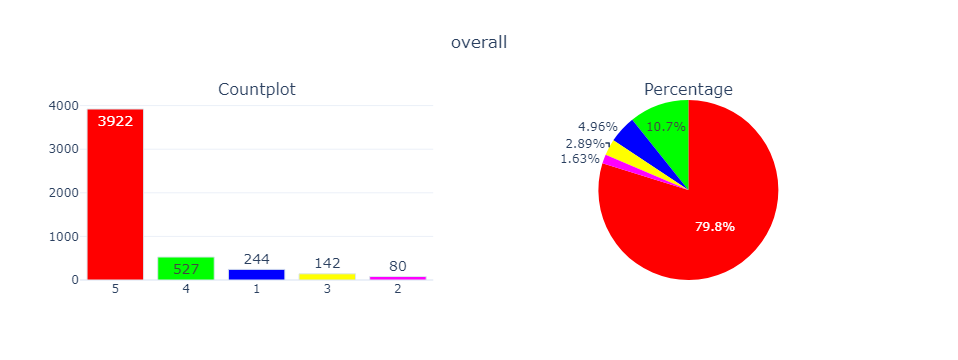

In [27]:
categorical_variable_summary(df, 'overall')

In [29]:
import plotly

print(plotly.__version__)


5.9.0


In [52]:
pip install plotly

In [30]:
import plotly.graph_objs as go


In [31]:
df.reviewText.head()

2031    [[ UPDATE - 6/19/2014 ]]So my lovely wife boug...
3449    I have tested dozens of SDHC and micro-SDHC ca...
4212    NOTE:  please read the last update (scroll to ...
317     If your card gets hot enough to be painful, it...
4672    Sandisk announcement of the first 128GB micro ...
Name: reviewText, dtype: object

In [32]:
review_example = df.reviewText[2031]
review_example

'[[ UPDATE - 6/19/2014 ]]So my lovely wife bought me a Samsung Galaxy Tab 4 for Father\'s Day and I\'ve been loving it ever since.  Just as other with Samsung products, the Galaxy Tab 4 has the ability to add a microSD card to expand the memory on the device.  Since it\'s been over a year, I decided to do some more research to see if SanDisk offered anything new.  As of 6/19/2014, their product lineup for microSD cards from worst to best (performance-wise) are the as follows:SanDiskSanDisk UltraSanDisk Ultra PLUSSanDisk ExtremeSanDisk Extreme PLUSSanDisk Extreme PRONow, the difference between all of these cards are simply the speed in which you can read/write data to the card.  Yes, the published rating of most all these cards (except the SanDisk regular) are Class 10/UHS-I but that\'s just a rating... Actual real world performance does get better with each model, but with faster cards come more expensive prices.  Since Amazon doesn\'t carry the Ultra PLUS model of microSD card, I had 

In [33]:
review_example = re.sub('{6a-zA-Z}','',review_example)
review_example

'[[ UPDATE - 6/19/2014 ]]So my lovely wife bought me a Samsung Galaxy Tab 4 for Father\'s Day and I\'ve been loving it ever since.  Just as other with Samsung products, the Galaxy Tab 4 has the ability to add a microSD card to expand the memory on the device.  Since it\'s been over a year, I decided to do some more research to see if SanDisk offered anything new.  As of 6/19/2014, their product lineup for microSD cards from worst to best (performance-wise) are the as follows:SanDiskSanDisk UltraSanDisk Ultra PLUSSanDisk ExtremeSanDisk Extreme PLUSSanDisk Extreme PRONow, the difference between all of these cards are simply the speed in which you can read/write data to the card.  Yes, the published rating of most all these cards (except the SanDisk regular) are Class 10/UHS-I but that\'s just a rating... Actual real world performance does get better with each model, but with faster cards come more expensive prices.  Since Amazon doesn\'t carry the Ultra PLUS model of microSD card, I had 

In [34]:
review_example = review_example.lower().split()

In [35]:
review_example

['[[',
 'update',
 '-',
 '6/19/2014',
 ']]so',
 'my',
 'lovely',
 'wife',
 'bought',
 'me',
 'a',
 'samsung',
 'galaxy',
 'tab',
 '4',
 'for',
 "father's",
 'day',
 'and',
 "i've",
 'been',
 'loving',
 'it',
 'ever',
 'since.',
 'just',
 'as',
 'other',
 'with',
 'samsung',
 'products,',
 'the',
 'galaxy',
 'tab',
 '4',
 'has',
 'the',
 'ability',
 'to',
 'add',
 'a',
 'microsd',
 'card',
 'to',
 'expand',
 'the',
 'memory',
 'on',
 'the',
 'device.',
 'since',
 "it's",
 'been',
 'over',
 'a',
 'year,',
 'i',
 'decided',
 'to',
 'do',
 'some',
 'more',
 'research',
 'to',
 'see',
 'if',
 'sandisk',
 'offered',
 'anything',
 'new.',
 'as',
 'of',
 '6/19/2014,',
 'their',
 'product',
 'lineup',
 'for',
 'microsd',
 'cards',
 'from',
 'worst',
 'to',
 'best',
 '(performance-wise)',
 'are',
 'the',
 'as',
 'follows:sandisksandisk',
 'ultrasandisk',
 'ultra',
 'plussandisk',
 'extremesandisk',
 'extreme',
 'plussandisk',
 'extreme',
 'pronow,',
 'the',
 'difference',
 'between',
 'all',
 'o

In [36]:
rt = lambda x: re.sub('[^a-zA-Z]', ' ',str(x))
df['reviewText'] = df['reviewText'].map(rt)
df['reviewText'] = df['reviewText'].str.lower()
df.head()

,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
2031,"Hyoun Kim ""Faluzure""",5,update so my lovely wife boug...,05-01-2013,702,1952,68,2020,1884,0.966337,0.957544
3449,NLee the Engineer,5,i have tested dozens of sdhc and micro sdhc ca...,26-09-2012,803,1428,77,1505,1351,0.948837,0.936519
4212,SkincareCEO,1,note please read the last update scroll to ...,08-05-2013,579,1568,126,1694,1442,0.925620,0.912139
317,"Amazon Customer ""Kelly""",1,if your card gets hot enough to be painful it...,09-02-2012,1033,422,73,495,349,0.852525,0.818577
4672,Twister,5,sandisk announcement of the first gb micro ...,03-07-2014,158,45,4,49,41,0.918367,0.808109


In [41]:
from textblob import TextBlob 
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

df[['polarity', 'subjectivity']] = df['reviewText'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))

for index, row in df['reviewText'].items():
    
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    if neg>pos:
        df.loc[index, 'sentiment'] = 'Negative'
    elif pos> neg:
        df.loc[index, 'sentiment'] = 'Positive'
    else:
        df.loc[index, 'sentiment'] = 'Neutral'

In [39]:
!pip install vaderSentiment


In [85]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


In [42]:
df[df['sentiment'] == 'Positive'].sort_values('wilson_lower_bound', ascending = False).head(5)

,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound,polarity,subjectivity,sentiment
2031,"Hyoun Kim ""Faluzure""",5,update so my lovely wife boug...,05-01-2013,702,1952,68,2020,1884,0.966337,0.957544,0.163859,0.562259,Positive
3449,NLee the Engineer,5,i have tested dozens of sdhc and micro sdhc ca...,26-09-2012,803,1428,77,1505,1351,0.948837,0.936519,0.103870,0.516435,Positive
4212,SkincareCEO,1,note please read the last update scroll to ...,08-05-2013,579,1568,126,1694,1442,0.925620,0.912139,0.212251,0.505394,Positive
317,"Amazon Customer ""Kelly""",1,if your card gets hot enough to be painful it...,09-02-2012,1033,422,73,495,349,0.852525,0.818577,0.143519,0.494207,Positive
4672,Twister,5,sandisk announcement of the first gb micro ...,03-07-2014,158,45,4,49,41,0.918367,0.808109,0.172332,0.511282,Positive


In [94]:
 categorical_variable_summary(df,'sentiment')

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score




In [45]:
X_train ,X_test, y_train ,y_test = train_test_split(df['reviewText'],df['sentiment'],test_size=0.2)

In [46]:
#vectorize the text data using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf =tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf=tfidf_vectorizer.transform(X_test)



In [47]:
logistic_regression_model =LogisticRegression()
logistic_regression_model.fit(X_train_tfidf,y_train)

y_pred =logistic_regression_model.predict(X_test_tfidf)

accuracy = accuracy_score(y_test,y_pred)
print("Accuracy",accuracy)

Accuracy 0.8372329603255341


In [48]:
print(df.columns)

Index(['reviewerName', 'overall', 'reviewText', 'reviewTime', 'day_diff',
       'helpful_yes', 'helpful_no', 'total_vote', 'score_pos_neg_diff',
       'score_average_rating', 'wilson_lower_bound', 'polarity',
       'subjectivity', 'sentiment'],
      dtype='object')


In [50]:
from sklearn.metrics import precision_score,recall_score,f1_score,classification_report

precision = precision_score(y_test,y_pred,average='macro')

recall = recall_score(y_test,y_pred,average='macro')
f1= f1_score(y_test,y_pred,average='macro')

report= classification_report(y_test,y_pred ,target_names=['Negative','Neutral','Positive'])


print("precision:",precision)
print("Recall:",recall)
print("F1Score:",f1)
print("\nClassification Report:\n",report)

precision: 0.8655997098793708
Recall: 0.41598299744367156
F1Score: 0.44046877364664655

Classification Report:
               precision    recall  f1-score   support

    Negative       0.76      0.22      0.34       126
     Neutral       1.00      0.04      0.07        56
    Positive       0.84      0.99      0.91       801

    accuracy                           0.84       983
   macro avg       0.87      0.42      0.44       983
weighted avg       0.84      0.84      0.79       983



ValueError: could not convert string to float: 'sandisk makes quality products and you can count on them at a small price than the competition  again  why pay more for the same thing when this fits the bill for your needs  save your extra money or give it to a needy family member    we recommend this product with an a  rating '